In [2]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
from all_funcs import mod_df
from all_funcs import add_factor
from all_funcs import three_graphs_one_plot
from all_funcs import fac_plots
from all_funcs import cap_outliers_by_list
from all_funcs import find_outliers_IQR
from all_funcs import ult_analysis
from all_funcs import test_mannwhitneyu
from all_funcs import siegel_tukey
from all_funcs import get_corr
from all_funcs import plot_pred
from all_funcs import train_test_split
from all_funcs import series_to_supervised
from all_funcs import pred_val
from all_funcs import graphs
from all_funcs import make_autocorr_plot
from all_funcs import make_autocorr_plot
# from all_funcs import persistence
# from all_funcs import make_forecasts
# from all_funcs import evaluate_forecasts
# from all_funcs import plot_forecasts
# from all_funcs import split_into_sequences
# from all_funcs import get_train_test_sets
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.ensemble import RandomForestRegressor
from lineartree import LinearBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
dfs = []
for name in ['datasets\газпром-капитал.xlsx', 'datasets\газпром-нефть.xlsx' , 'datasets\гсп-финанс.xlsx']:
  dfs.append(mod_df(name))

In [4]:
for i in range(len(dfs)):
  for name in ['datasets/rucbitr3+.xlsx', 'datasets/rucbcp3a3yns.xlsx',  'datasets/indexes.xlsx', 'datasets/ставка-ruonia.xlsx', 'datasets/usd_rub-(fx) (1).xlsx',
              'datasets/corp_bonds_volume.xlsx', 'datasets/cpi.xlsx', 'datasets/inflation.xlsx', 'datasets/rub-yield-curve-10y (1).xlsx',
               'datasets/ofz_volume.xlsx',  'datasets/umemployment.xlsx']:
    dfs[i] = add_factor(dfs[i], name)
    dfs[i]['key_0'] = pd.to_datetime(dfs[i]['key_0'])
    dfs[i] = dfs[i].set_index('key_0')

In [5]:
dfs[0]

,Indicative,YTM Indicative,G-spread,t,ISIN,name,RUCBITR3+,RUCBCP3A3YNS,indexes,Ставка RUONIA,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB",Россия базовые потребительские цены,Россия уровень инфляции в годовом выражении,RUB Yield Curve 10Y,"Объем рынка ОФЗ - Россия, RUB",Россия уровень безработицы
key_0,,,,,,,,,,,,,,,,,
2022-01-03,94.310,7.7756,-50.020518,1,RU000A101QM3,datasets\газпром-капитал.xlsx,579.67,100.51,9.5,8.04,74.58064,17569.19,100.8,8.73,8.3678,15609.31,4.4
2022-01-04,95.690,7.2774,-99.370041,2,RU000A101QM3,datasets\газпром-капитал.xlsx,581.62,100.72,9.5,8.04,75.16675,17569.19,100.8,8.73,8.3704,15609.31,4.4
2022-01-05,95.860,7.2177,-103.016096,3,RU000A101QM3,datasets\газпром-капитал.xlsx,582.30,100.80,9.5,8.04,76.11534,17569.19,100.8,8.73,8.3386,15609.31,4.4
2022-01-06,94.460,7.7249,-77.543727,4,RU000A101QM3,datasets\газпром-капитал.xlsx,581.72,100.56,9.5,8.04,76.43210,17569.19,100.8,8.73,8.4660,15609.31,4.4
2022-01-07,94.460,7.7249,-77.543727,5,RU000A101QM3,datasets\газпром-капитал.xlsx,580.31,100.32,9.5,8.04,75.27871,17569.19,100.8,8.73,8.5759,15609.31,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,93.405,9.2590,97.102614,435,RU000A101QM3,datasets\газпром-капитал.xlsx,626.14,101.55,7.5,7.02,75.55000,21262.38,100.1,3.50,10.7822,18737.62,3.5
2023-03-14,93.180,9.3884,108.678327,436,RU000A101QM3,datasets\газпром-капитал.xlsx,626.41,101.56,7.5,7.14,75.75000,21262.38,100.1,3.50,10.8069,18737.62,3.5
2023-03-15,93.365,9.2897,99.530144,437,RU000A101QM3,datasets\газпром-капитал.xlsx,626.72,101.59,7.5,7.29,76.42500,21262.38,100.1,3.50,10.8428,18737.62,3.5


In [6]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2022-01-03 to 2023-03-17
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         439 non-null    float64
 1   YTM Indicative                                     439 non-null    float64
 2   G-spread                                           439 non-null    float64
 3   t                                                  439 non-null    int64  
 4   ISIN                                               439 non-null    object 
 5   name                                               439 non-null    object 
 6   RUCBITR3+                                          439 non-null    float64
 7   RUCBCP3A3YNS                                       439 non-null    float64
 8   indexes                                            439 non-null    floa

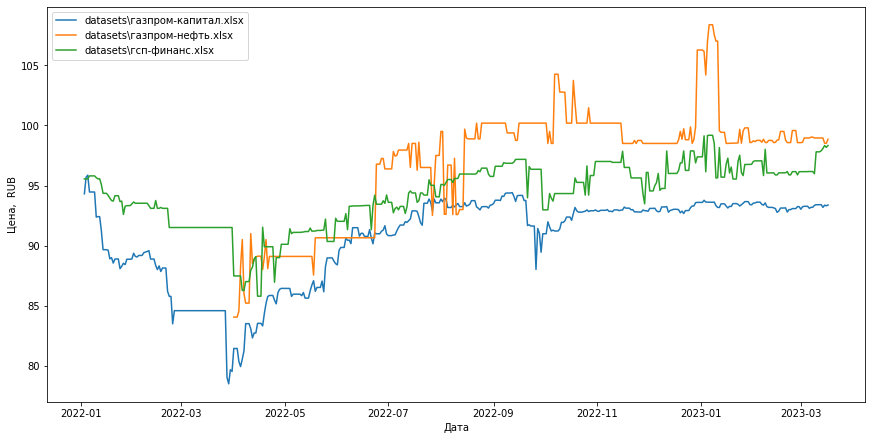

In [7]:
three_graphs_one_plot([dfs[0], dfs[1], dfs[2]])

In [8]:
df_alph_full = dfs[0][dfs[0].index >= '2022-05-01']
df_alph_full['t'] = [i for i in range(len(df_alph_full))]

C:\Temp\ipykernel_14568\613649094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alph_full['t'] = [i for i in range(len(df_alph_full))]


Text(0.5, 0, 'Дата')

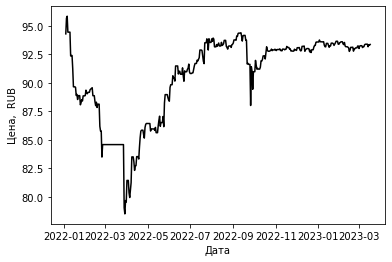

In [9]:
plt.plot(pd.date_range(start='2022-01-03',end='2023-03-17'), dfs[0]['Indicative'], 'k-')
plt.ylabel("Цена,  RUB")
plt.xlabel("Дата")

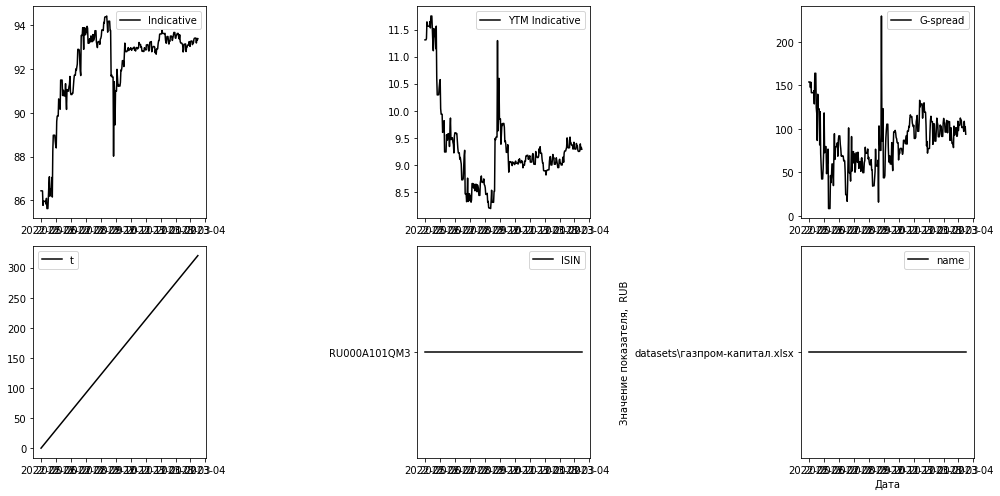

In [10]:
fac_plots(df_alph_full)

In [11]:
df_alph = df_alph_full.copy()

In [12]:
outliers = {}
for name in df_alph.select_dtypes(include = numerics).columns:
  outliers['{}'.format(name)] = find_outliers_IQR(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
  if len(outliers[name]) > 0:
    df_alph[name] = cap_outliers_by_list(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

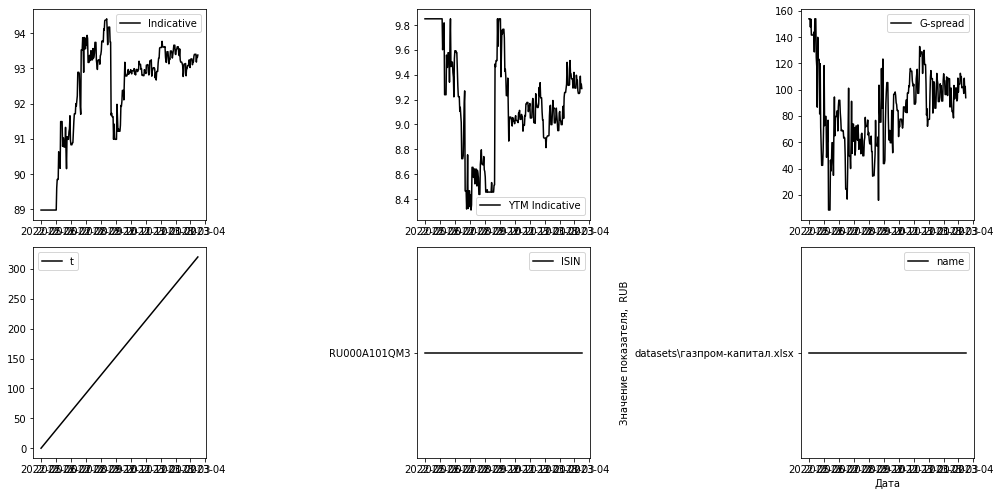

In [13]:
fac_plots(df_alph)

MSE = 0.02036


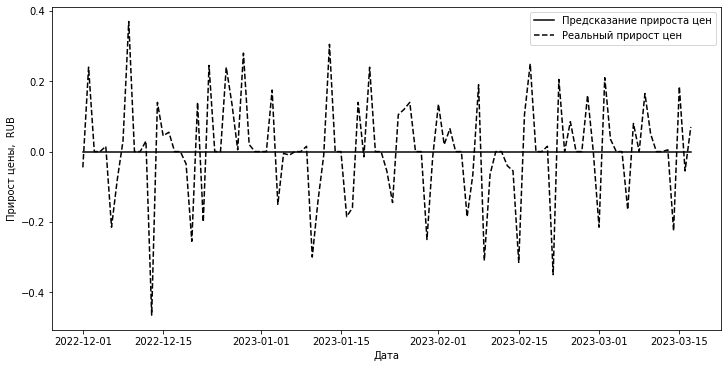

In [14]:
#Trivial model

pred_val((df_alph['Indicative'][213:] - df_alph['Indicative'][213:].shift(1)).dropna(), [0 for i in range(107)])

### Linear models

In [15]:
siegel_tukey(df_alph['Indicative'])
test_mannwhitneyu(df_alph['Indicative'])

z value: -10.435
Probably different distributions
stat=8.51e+03, p=8.51e+03
Probably different distributions


In [16]:
df_alph['Indicative'] = df_alph['Indicative'] - df_alph['Indicative'].shift(1)
df_alph_uni = df_alph[['Indicative', 't']]
df_alph_uni = df_alph_uni[1:]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_alph_uni['t'], df_alph_uni['Indicative'], 107)

In [18]:
import statsmodels.api as sm

X_lm = sm.add_constant(X_train)
regr = sm.OLS(y_train, X_lm)
regr2 = regr.fit()
print(regr2.summary())

                            OLS Regression Results                            
Dep. Variable:             Indicative   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5490
Date:                Sat, 10 Jun 2023   Prob (F-statistic):              0.460
Time:                        16:21:12   Log-Likelihood:                -64.537
No. Observations:                 213   AIC:                             133.1
Df Residuals:                     211   BIC:                             139.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0475      0.045      1.050      0.2

MSE = 0.02122


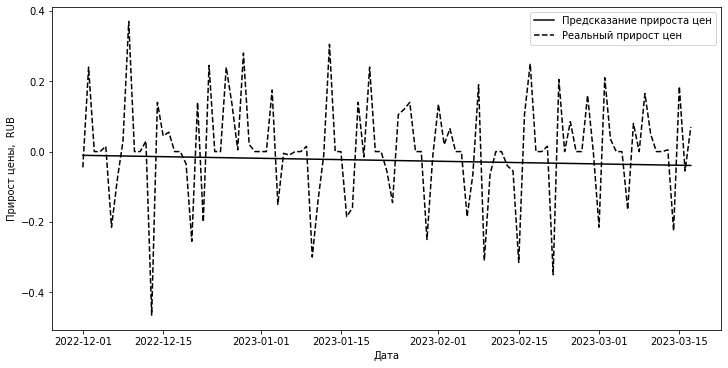

In [19]:

prediction = regr2.predict(sm.add_constant(X_test))

print('MSE = %.4g' % mean_squared_error(y_test, prediction))

plot_pred(prediction, y_test)

### ARIMA

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


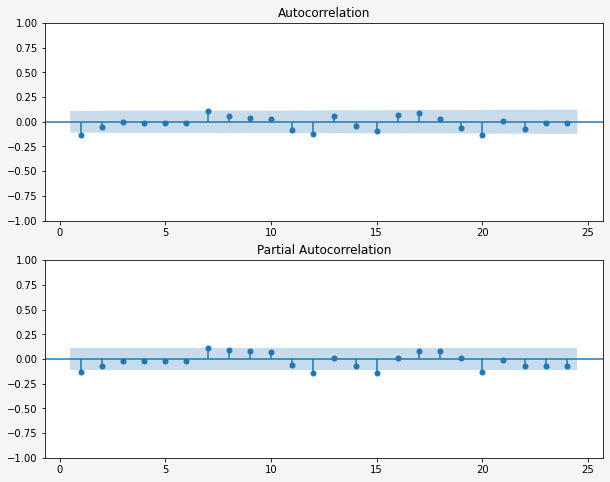

In [20]:
make_autocorr_plot(df_alph_uni['Indicative'])

In [21]:
train = df_alph_uni['Indicative'][:213]
test = df_alph_uni['Indicative'][213:]

In [22]:
arima_model = ARIMA(train, order = (1,0,1))
model = arima_model.fit()
print(model.summary())

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Indicative   No. Observations:                  213
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -62.372
Date:                Sat, 10 Jun 2023   AIC                            132.745
Time:                        16:21:13   BIC                            146.190
Sample:                    05-02-2022   HQIC                           138.178
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0185      0.020      0.903      0.367      -0.022       0.059
ar.L1          0.2575      0.371      0.694      0.488      -0.470       0.985
ma.L1         -0.4043      0.341     -1.185      0.2

MSE = 0.02053


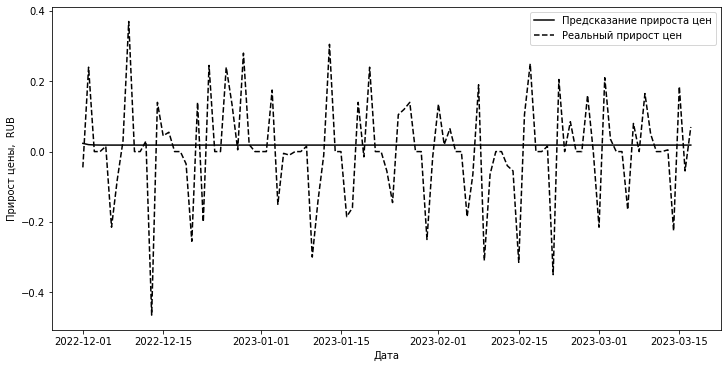

In [23]:
prediction = model.forecast(107)

print('MSE = %.4g' % mean_squared_error(test, prediction))

plot_pred(prediction, test)

### LSTM

In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
 names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
 if i == 0:
  names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
 else:
  names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = pd.concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg


def persistence(last_ob, n_seq):
 return [last_ob for i in range(n_seq)]

# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = np.sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))
                
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	plt.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i
		off_e = off_s + len(forecasts[i])
		xaxis = [x for x in range(off_s, off_e)]
		plt.plot(xaxis, forecasts[i], color='red')
	# show the plot
	plt.show()

In [25]:
def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    X_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    X_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return X_train, y_train, X_test, y_test

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
price = df_alph['Indicative'].values.reshape(-1, 1)
scaled_price = scaler.fit_transform(price)

In [27]:
seq_len = 50

x_train, y_train, x_test, y_test = get_train_test_sets(scaled_price, seq_len, train_frac=0.61)
# x_train, y_train, x_test, y_test = get_train_test_sets(df_alph['Indicative'].values.reshape(-1, 1), seq_len, train_frac=0.525)


In [28]:
len(y_test)

107

In [29]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(
    LSTM(window_size, return_sequences=True, 
         input_shape=(window_size, x_train.shape[-1]))
)

model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(
    Bidirectional(LSTM((window_size * 2), return_sequences=True)
)) 

model.add(Dropout(rate=dropout))
model.add(
    Bidirectional(LSTM(window_size, return_sequences=False))
) 

model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

In [30]:
x_train = x_train[1:]
y_train = y_train[1:]

In [31]:
batch_size = 15

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.2
)

Epoch 1/10


In [ ]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

MSE = 0.02623


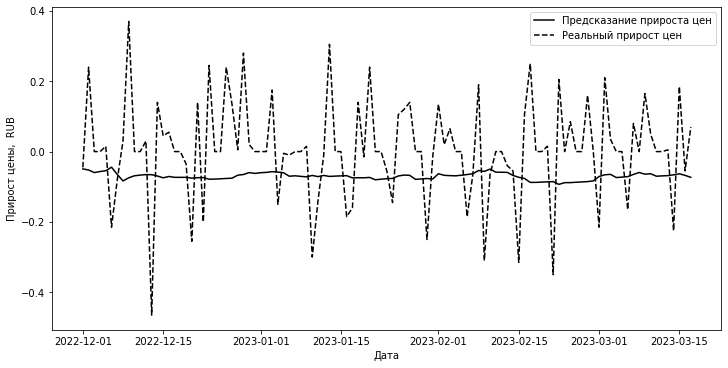

In [ ]:
pred_val(y_test_orig, y_pred_orig)

### Multivariate models

In [ ]:
df_alph = df_alph_full.copy()
df_alph = df_alph.select_dtypes(include=numerics)

In [ ]:
df_alph.head(5)

,Indicative,YTM Indicative,G-spread,t,RUCBITR3+,RUCBCP3A3YNS,indexes,Ставка RUONIA,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB",Россия базовые потребительские цены,Россия уровень инфляции в годовом выражении,RUB Yield Curve 10Y,"Объем рынка ОФЗ - Россия, RUB",Россия уровень безработицы
key_0,,,,,,,,,,,,,,,
2022-05-01,86.440,11.3093,153.798067,0,538.48,95.73,14.0,13.68,73.35063,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-02,86.440,11.3093,153.798067,1,538.48,95.73,14.0,13.68,70.92121,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-03,86.440,11.3093,153.798067,2,538.48,95.73,14.0,13.68,68.13433,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-04,86.435,11.3349,147.539172,3,538.48,95.73,14.0,13.68,66.08850,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-05,85.775,11.6414,153.500940,4,537.53,95.75,11.0,14.00,65.88899,16888.34,100.4,17.1,10.4369,15723.28,3.9


In [ ]:
outliers = {}
for name in df_alph.select_dtypes(include = numerics).columns:
  outliers['{}'.format(name)] = find_outliers_IQR(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
  if len(outliers[name]) > 0:
    df_alph[name] = cap_outliers_by_list(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

In [ ]:
df_alph = (df_alph - df_alph.shift(1)).dropna()

In [ ]:

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-08-30'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-08-30'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

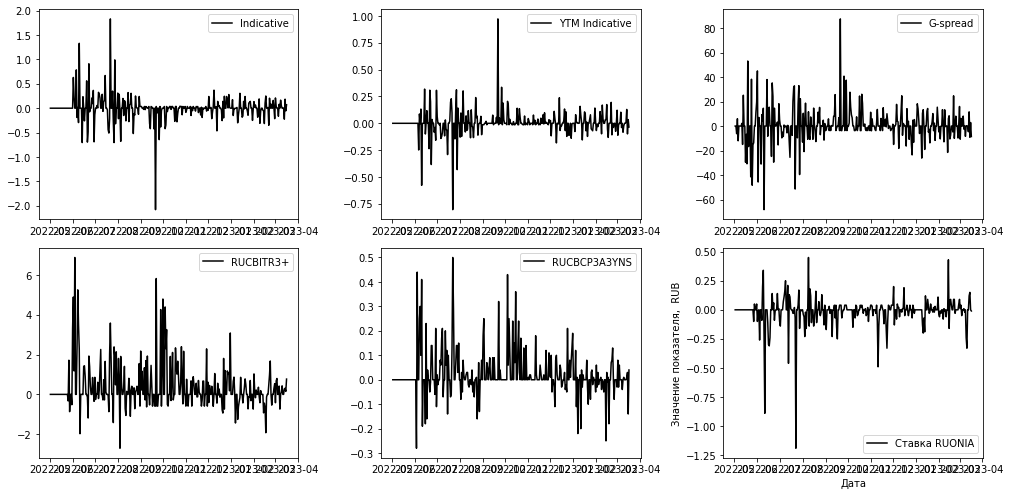

In [ ]:
fac_plots(df_alph.drop(['t', 'indexes'], axis = 1))

In [ ]:
df_alph['t'] = [i for i in range(len(df_alph))]

In [ ]:
df_alph.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2022-05-02 to 2023-03-17
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         320 non-null    float64
 1   YTM Indicative                                     320 non-null    float64
 2   G-spread                                           320 non-null    float64
 3   t                                                  320 non-null    int64  
 4   RUCBITR3+                                          320 non-null    float64
 5   RUCBCP3A3YNS                                       320 non-null    float64
 6   indexes                                            320 non-null    float64
 7   Ставка RUONIA                                      320 non-null    float64
 8   USD/RUB (FX)                                       320 non-null    floa

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2022-05-02 to 2023-03-17
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         320 non-null    float64
 1   YTM Indicative                                     320 non-null    float64
 2   G-spread                                           320 non-null    float64
 3   t                                                  320 non-null    int64  
 4   RUCBITR3+                                          320 non-null    float64
 5   RUCBCP3A3YNS                                       320 non-null    float64
 6   indexes                                            320 non-null    float64
 7   Ставка RUONIA                                      320 non-null    float64
 8   USD/RUB (FX)                                       320 non-null    floa

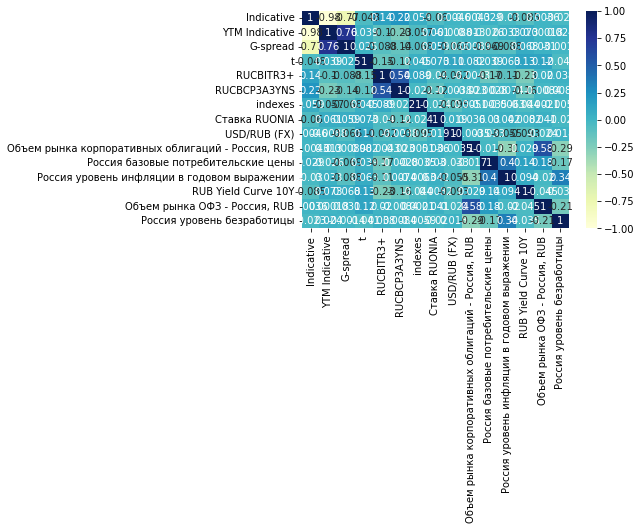

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 4
key_0
2022-06-02    0.630
2022-06-03    0.240
2022-06-06    0.785
2022-06-07   -0.190
2022-06-09   -0.295
              ...  
2023-03-02    0.210
2023-03-06   -0.165
2023-03-09    0.165
2023-03-14   -0.225
2023-03-15    0.185
Name: Indicative, Length: 103, dtype: float64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 5


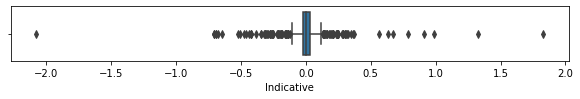

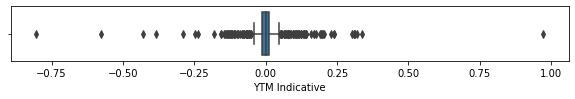

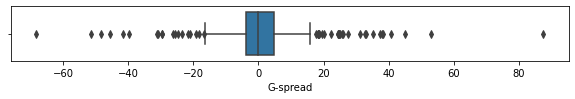

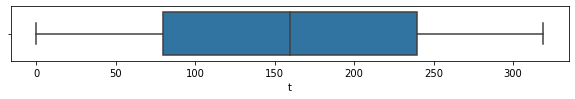

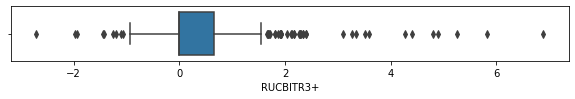

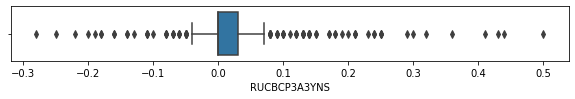

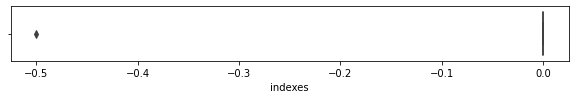

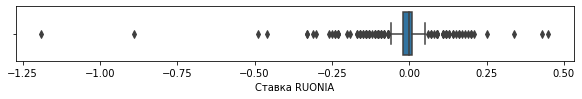

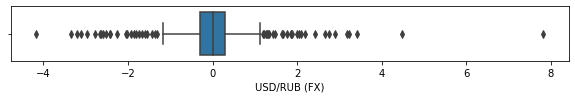

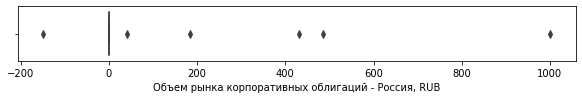

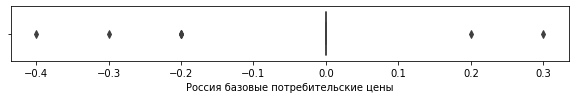

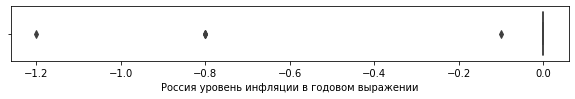

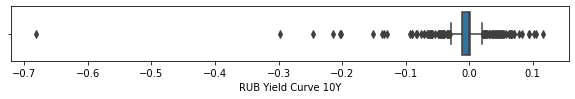

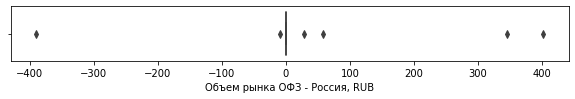

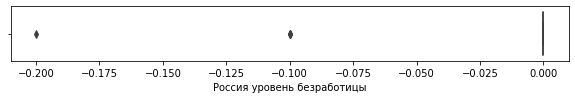

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 6


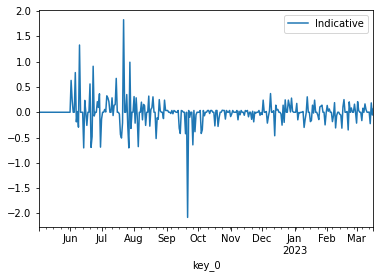

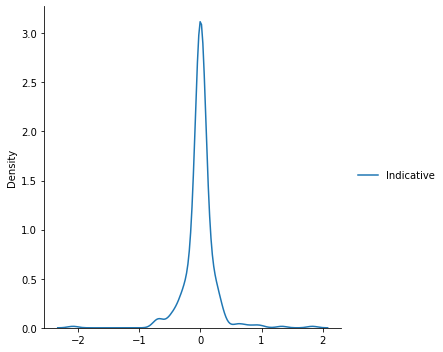

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 7
Тест Jarque Bera
        JB        p-value         skew              kurtosis    
----------------------------------------------------------------
5980.411676762621     0.0 -0.01405259964230548 24.17852888788477
----------------------------------------------------------------

Тест Шапиро-Уилк
Statistics=0.694, p-value=0.000
Отклонить гипотезу о нормальности
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 8
Тест Jarque Bera
        JB        p-value         skew              kurtosis    
----------------------------------------------------------------
5980.411676762621     0.0 -0.01405259964230548 24.17852888788477
----------------------------------------------------------------

Тест Шапиро-Уилк
Statistics=0.694, p-value=0.000
Отклонить гипотезу о нормальности
None


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


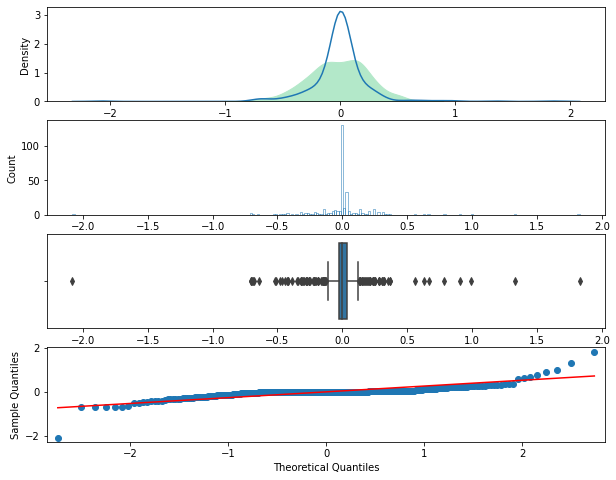

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 9


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


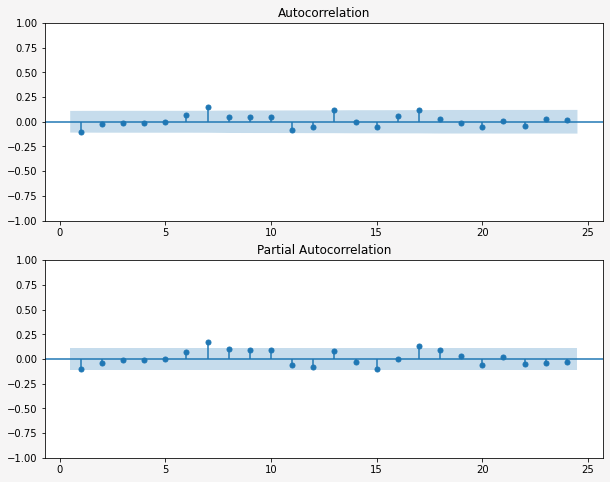

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 10
Тестирование средних. Статистика Стьюдента: 0.0010879747764587658. Критическое значение: 1.6544935026291934
Тестирование дисперсий. Статистика Фишера: 0.125381667922428. Критическое значение: 1.2991010723726828
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 11
excess kurtosis of normal distribution (should be 0): 21.17852888788477
skewness of normal distribution (should be 0): -0.01405259964230548


In [ ]:
ult_analysis(df_alph)

In [ ]:
siegel_tukey(df_alph['Indicative'])
test_mannwhitneyu(df_alph['Indicative'])

z value: 1.143
Probably the same distribution
stat=1.25e+04, p=1.25e+04
Probably the same distribution


<AxesSubplot:>

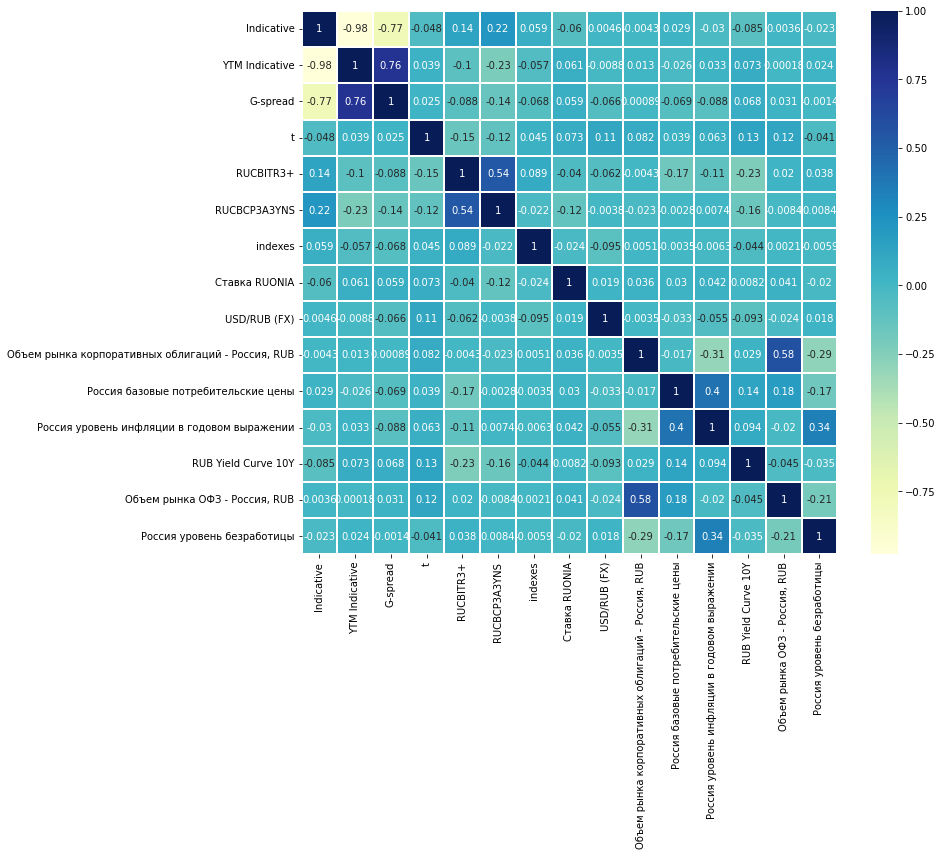

In [ ]:
corrmat = df_alph.corr(method='pearson')

corrmat_significance = np.abs(corrmat/np.sqrt(1-np.power(corrmat,2))*np.sqrt(70))
corrmat_significance.values[[np.arange(corrmat_significance.shape[0])]*2] = 0

f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, annot=True, vmax=1)

### Feature selection

In [ ]:
for name in df_alph.drop('Indicative', axis = 1).columns:
    df_alph[name] = df_alph[name].shift(1)
df_alph = df_alph.dropna()

In [ ]:
X = df_alph.drop('Indicative', axis = 1).select_dtypes(include=numerics)
Y = df_alph['Indicative']

In [ ]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
set_printoptions(precision=3)
print(fit.scores_)

[0.862 0.861 1.126 1.284 0.855 1.495 0.597 1.747 0.797 0.285 1.963 0.485
 0.377 0.617]


[177.145  16.27   35.965  18.401 132.882  19.645  96.738  19.607   7.084
  17.29   98.02   11.984 159.395  14.163]

In [ ]:
X.columns

Index(['YTM Indicative', 'G-spread', 't', 'RUCBITR3+', 'RUCBCP3A3YNS',
       'indexes', 'Ставка RUONIA', 'USD/RUB (FX)',
       'Объем рынка корпоративных облигаций - Россия, RUB',
       'Россия базовые потребительские цены',
       'Россия уровень инфляции в годовом выражении', 'RUB Yield Curve 10Y',
       'Объем рынка ОФЗ - Россия, RUB', 'Россия уровень безработицы'],
      dtype='object')

In [ ]:
# alph_feat = df_alph[['Indicative', 'YTM Indicative', 'G-spread', 'indexes', 'RUCBITR3+']]
alph_feat = df_alph[['Indicative', 'YTM Indicative', 'indexes', 'USD/RUB (FX)']]

In [ ]:
alph_feat.head(2)

,Indicative,YTM Indicative,indexes,USD/RUB (FX)
key_0,,,,
2022-05-03,0.0,0.0,0.0,-2.42942
2022-05-04,0.0,0.0,0.0,-2.78688


In [ ]:
len(df_alph)

319

## Modeling

### Random forest

In [ ]:
y = alph_feat['Indicative']
X = alph_feat.drop('Indicative', axis = 1)

In [ ]:
n_test = 107
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args

n_features = X.shape[1]

reg = XGBRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Best score=0.1700
Best parameters:
- max_depth=1
- learning_rate=0.035733
- max_features=1
- min_samples_split=2
- min_samples_leaf=100
- n_estimators=84


MSE = 0.02084


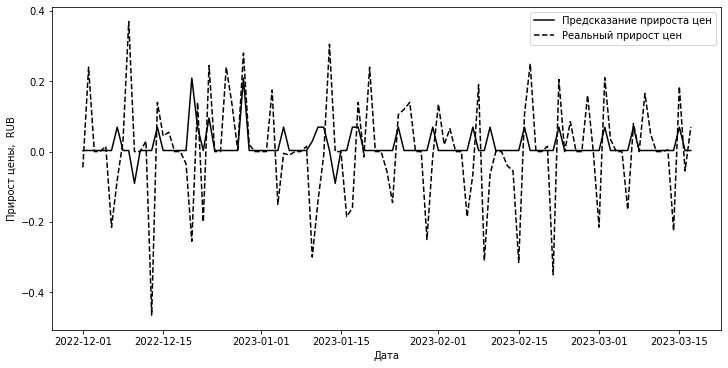

In [ ]:

regressor = XGBRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

MSE = 0.02053


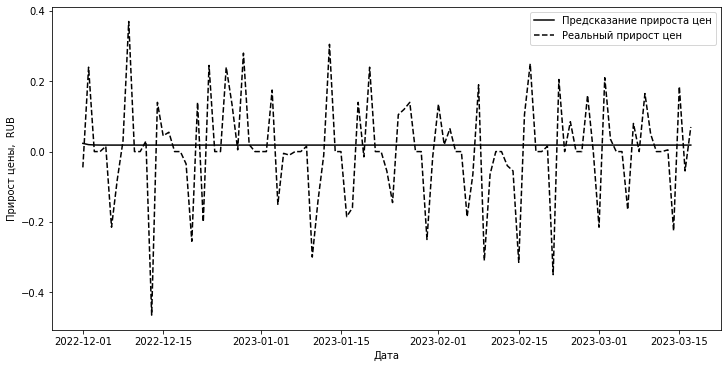

In [ ]:
pred_val(y_test, prediction)

In [ ]:
n_features = X.shape[1]

reg = RandomForestRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))


Best score=0.1454
Best parameters:
- max_depth=5
- max_features=3
- min_samples_split=2
- min_samples_leaf=100
- n_estimators=2


MSE = 0.02038


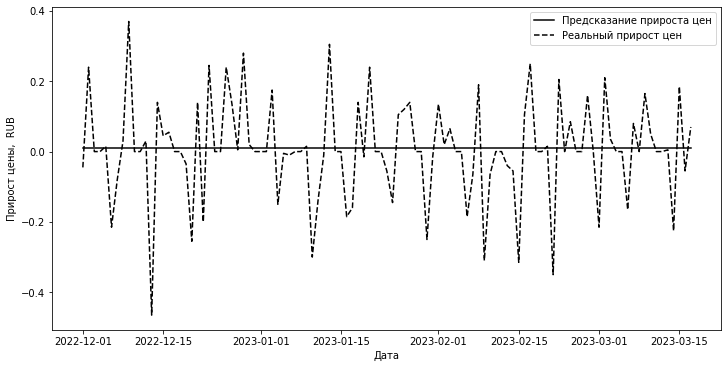

In [ ]:

regressor = RandomForestRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

n_features = X.shape[1]

reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))


Best score=0.1472
Best parameters:
- max_depth=5
- learning_rate=0.000249
- max_features=1
- min_samples_split=16
- min_samples_leaf=1
- n_estimators=100


In [ ]:
0.01023/0.01038

0.9855491329479767

MSE = 0.02038


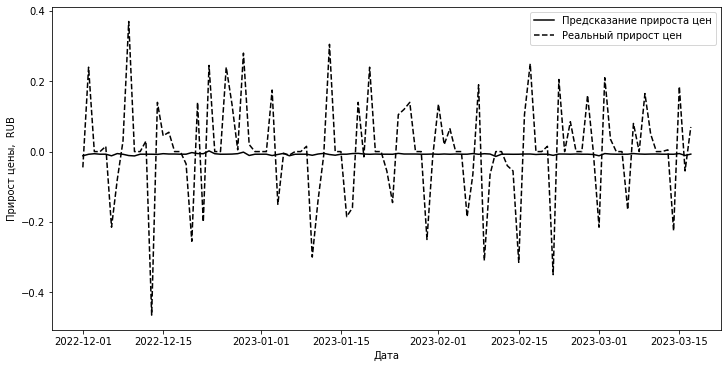

In [ ]:

regressor = GradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor()
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2]))


Best score=0.1475
Best parameters:
- max_depth=1
- learning_rate=0.002312
- min_samples_leaf=56


MSE = 0.02051


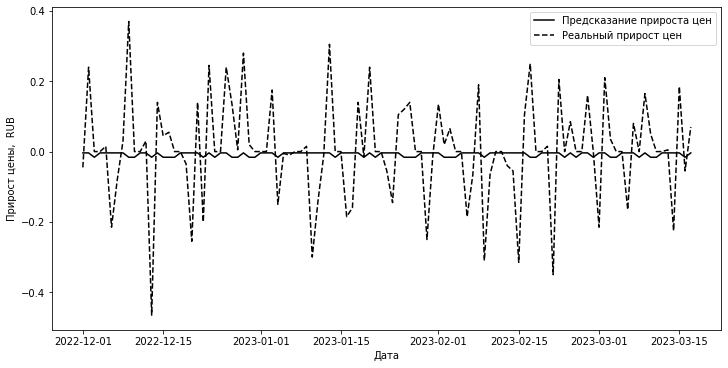

In [ ]:
regressor = HistGradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], min_samples_leaf=res_gp.x[2])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(loss = 'linear')
space  = [Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- learning_rate=%.6f
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1]))


Best score=0.1598
Best parameters:
- learning_rate=0.002646
- n_estimators=38


MSE = 0.02118


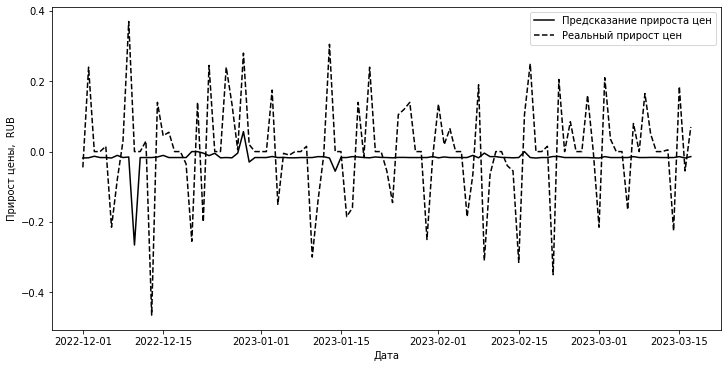

In [ ]:
regressor = AdaBoostRegressor(loss = 'linear', learning_rate=res_gp.x[0], n_estimators=res_gp.x[1])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_samples'),
          Integer(1, n_features, name='max_features'),
          Integer(1, 100, name='verbose'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_samples=%d
- max_features=%d
- verbose=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3]))


Best score=0.1467
Best parameters:
- max_samples=2
- max_features=1
- verbose=1
- n_estimators=2


MSE = 0.02034


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


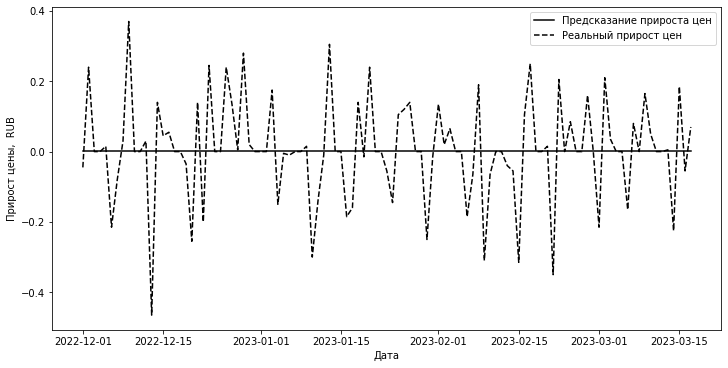

In [ ]:
regressor = BaggingRegressor(max_samples=res_gp.x[0], max_features=res_gp.x[1], verbose=res_gp.x[2], n_estimators=res_gp.x[3])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from lineartree           import LinearBoostRegressor

reg = LinearBoostRegressor(base_estimator=LinearRegression(), loss = 'linear')
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best score=0.1637
Best parameters:
- max_depth=4
- max_features=2
- min_samples_split=40
- min_samples_leaf=84
- n_estimators=35


MSE = 0.02401


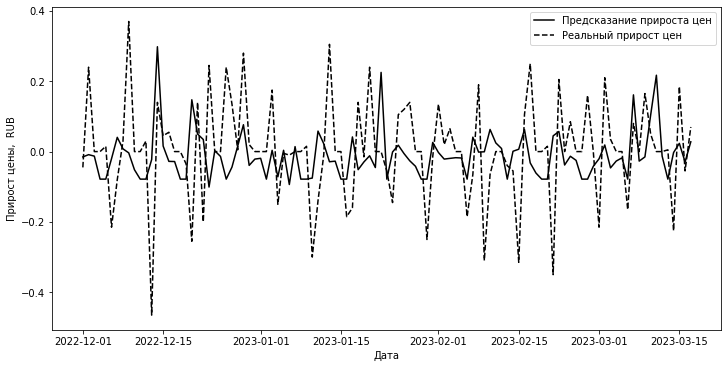

In [ ]:
regressor = LinearBoostRegressor(base_estimator=LinearRegression(),
                                 max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

reg = DecisionTreeRegressor(random_state = 0) 
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3]))


Best score=0.1454
Best parameters:
- max_depth=5
- max_features=2
- min_samples_split=100
- min_samples_leaf=58


MSE = 0.01997


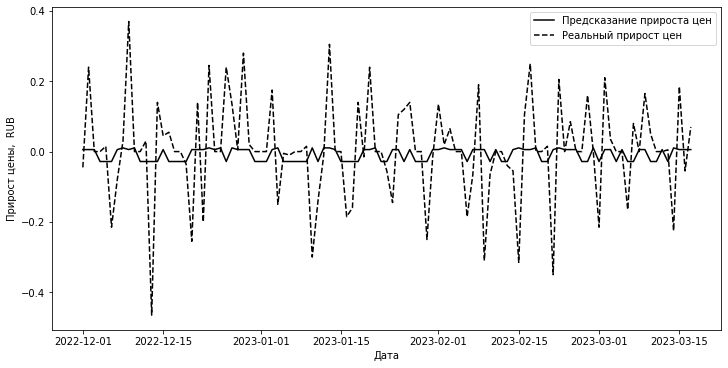

In [ ]:
regressor = DecisionTreeRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf = res_gp.x[3])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)